<a href="https://colab.research.google.com/github/Lotfullah21/Data-Analysis/blob/main/The_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means


### Import Libraries

In [115]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

## K Means on randomly generated data

In [116]:
data = np.random.seed(0)

make_blobs Generate isotropic Gaussian blobs for clustering, we can see bellow that it takes inputs and outputs the integer label for class membership each sample
Inputs:
* number of samples = 1000
* we will specify centers for these samples so that our data will gather around these samples
* cluster std = 0.8. it means how sparse our data should be
* number of features = 3

Outputs:

X: 
* Array of shape [n_samples, n_features]. (Feature Matrix).
** the generated samples

Y:
* Array of shape [n_samples]. (Response Vector)
**  The integer labels for cluster membership of each sample.

*sklearn.datasets.make_blobs(n_samples=100, n_features=2, , centers=None, cluster_std=1.0, center_box=(- 10.0, 10.0), shuffle=True, random_state=None, return_centers=False)[source]*

## FIRST
we will look into fewer data point to get a clear view of how the centers and data points distributed around the center

In [117]:
x,y = make_blobs(n_samples=200, centers=[[-1,3], [-2, -4], [1,-1], [4, 2]], cluster_std=0.7)

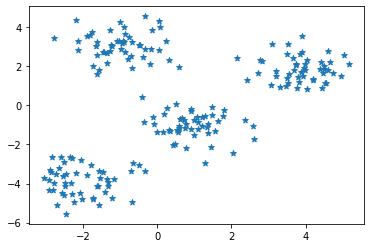

In [118]:
plt.scatter(x[:, 0], x[:,1], marker='*')

## NEXT
Lets look into this with more data points?

In [119]:
X,y = make_blobs(n_samples=4000, centers=[[-1,3], [-2, -4], [1,-1], [4, 2],[-10,-13]], cluster_std=0.8)

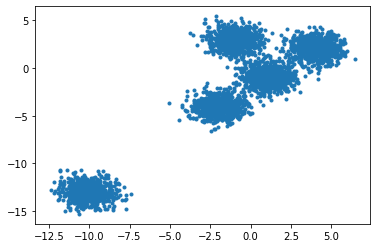

In [120]:
plt.scatter(X[:, 0], X[:,1], marker='.')

## Setting Up K Means

*class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')*

* ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.
* n_clusters: The number of clusters to form as well as the number of centroids to generate
* n_init , int, default=10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
* max_iterint, default=300
Maximum number of iterations of the k-means algorithm for a single run.
* random_stateint, RandomState instance or None, default=None
Determines random number generation for centroid initialization. Use an int to make the randomness deterministic. 

src = https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans

In [136]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)

Lets fit the feature matrix by calling kmeans.fit(feature matrix)

In [137]:
kmeans.fit(X)
kmeans_labels = kmeans.labels_
print(kmeans_labels[0:20])

[1 4 3 0 0 0 4 3 1 0 0 4 3 1 3 1 4 4 1 3]


In [138]:
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers

array([[ -2.00069049,  -4.05438954],
       [  1.01474757,  -0.95635673],
       [-10.04910994, -13.00849043],
       [ -0.96590369,   2.96711541],
       [  4.01162311,   2.029349  ]])

In [158]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
print(kmeans_labels[0:20])
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers

[4 3 2 0 0 0 3 2 4 0 0 3 2 4 2 4 3 3 4 2]


array([[ -2.00069049,  -4.05438954],
       [-10.04910994, -13.00849043],
       [ -0.96590369,   2.96711541],
       [  4.00967807,   2.02755575],
       [  1.01294148,  -0.9582999 ]])

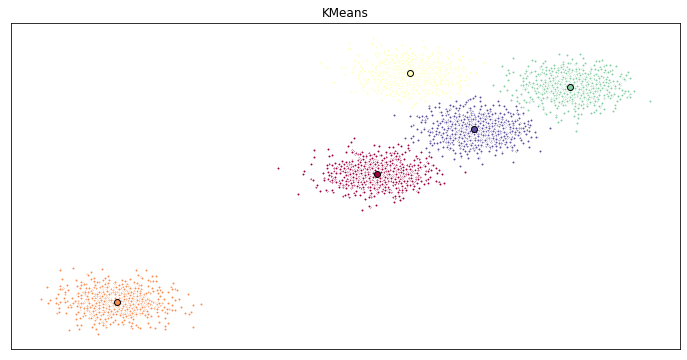

In [159]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 6))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[-1,3], [-2, -4], [1,-1], [4, 2],[-12,-13]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (kmeans_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = kmeans_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
